# Technical Parameters

## Package loading

In [1]:
from modules.ezs_func import *
from modules.ezs_model import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.neighbors import LocalOutlierFactor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot
from ydata_profiling import ProfileReport


### Project name

In [2]:
name = 'TS_Sunspots'

### Thresholds & other parameters

In [3]:
problem_type = 'regression'

In [4]:
data_size = 'small'

In [5]:
threshold_NaN = 0.5

In [6]:
threshold_cat = 5

In [7]:
threshold_Z = 3.0

In [8]:
test_size = 0.33

In [9]:
threshold_entropy = 0.75

In [10]:
undersampling = False

In [11]:
undersampler = 'Random'

In [12]:
threshold_corr = 1.0

In [13]:
threshold_model = 5

In [14]:
threshold_score = 0.7

In [15]:
threshold_feature = 5

In [16]:
with_keras = False

In [17]:
CPU = False

In [18]:
time_dep = True

In [19]:
date_idx = 1

In [20]:
lag_number = 4

In [21]:
level_1_model = 'regression'

In [22]:
random_state = 42

### File & target

In [23]:
path = '/home/fifi/Documents/ezstacking/dataset/Sunspots.csv'

In [24]:
df = pd.read_csv(path, index_col = date_idx, parse_dates = True)

In [25]:
target_col = 'Total_Sunspot_Number'

### Deployment

In [26]:
FastAPI_port = 8000

In [27]:
Docker_port = 80

# Exploratory Data Analysis (EDA)

## Drop user's columns & Duplicates

In [28]:
user_drop_cols = ['Unnamed: 0']

Dataset before deletion

In [29]:
display(df)

Unnamed: 0  Total_Sunspot_Number
Date                                        
1749-01-31           0                  96.7
1749-02-28           1                 104.3
1749-03-31           2                 116.7
1749-04-30           3                  92.8
1749-05-31           4                 141.7
...                ...                   ...
2020-09-30        3260                   0.6
2020-10-31        3261                  14.4
2020-11-30        3262                  34.0
2020-12-31        3263                  21.8
2021-01-31        3264                  10.4

[3265 rows x 2 columns]

In [30]:
df = df.drop(user_drop_cols, axis=1)

In [31]:
dropped_cols = user_drop_cols

Duplicate rows:

In [32]:
df = duplicates(df)

Number of rows before removing: 3265
Number of duplicate rows: 1666
Number of rows after removing: 1599


Drop all the rows for which the target is NaN

In [33]:
df = df.dropna(subset=[target_col])

Dataset after deletion of user’s columns and duplicates

In [34]:
display(df)

Total_Sunspot_Number
Date                            
1749-01-31                  96.7
1749-02-28                 104.3
1749-03-31                 116.7
1749-04-30                  92.8
1749-05-31                 141.7
...                          ...
2017-02-28                  26.4
2018-06-30                  15.6
2018-12-31                   3.1
2019-03-31                   9.4
2020-12-31                  21.8

[1599 rows x 1 columns]

### Dataset copy

In [35]:
df_copy = df.copy()

## Dataset Information

### Dataframe structure

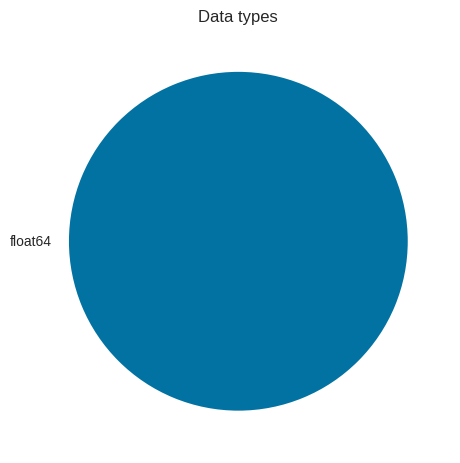

In [36]:
plot_dataframe_structure(df)

### Dataframe statistics

In [37]:
display(df.describe().T)

count        mean        std  min    25%   50%     75%  \
Total_Sunspot_Number  1599.0  105.328518  73.411393  0.0  43.95  94.2  156.65   

                        max  
Total_Sunspot_Number  398.2

## Correlation & Autocorellation

In [38]:
plot_correlation(df, target_col, t=1)

No correlation for univariate time series


In [39]:
plot_acf_pacf(df, column=df.columns.to_list())

interactive(children=(Dropdown(description='column', options=('Total_Sunspot_Number',), value='Total_Sunspot_N…

## Seasonal decomposition

### Seasonal decomposition with one period

In [40]:
plot_seasonal_decompose(df, column=df.columns.to_list(), model=['additive', 'multiplicative'], period=(1,int(df.shape[0]/4),1))

interactive(children=(Dropdown(description='column', options=('Total_Sunspot_Number',), value='Total_Sunspot_N…

### Seasonal decomposition with two periods

In [41]:
plot_seasonal_decompose_2(df, column=df.columns.to_list(), period1=(1,int(df.shape[0]/4),1), period2=(1,20,1))

interactive(children=(Dropdown(description='column', options=('Total_Sunspot_Number',), value='Total_Sunspot_N…

### Unobserved components decomposition

In [42]:
plot_unobserved_components(df, column=df.columns.to_list(), model=model_uc, method=method, confidence=(0.8,1,0.01))

interactive(children=(Dropdown(description='column', options=('Total_Sunspot_Number',), value='Total_Sunspot_N…

### EDA with Ydata profiling

In [43]:
profile = ProfileReport(df_copy, tsmode=True)

In [44]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Convert time series to supervised learning problem 

In [45]:
df_copy = df.copy()

In [46]:
df_s, target_col_ts, preds = ts_dataframe_to_supervised(df_copy, target=target_col, n_in=lag_number, n_out=0, dropT=True)

### Quick EDA 

Correlation matrix


Hierarchical clustering


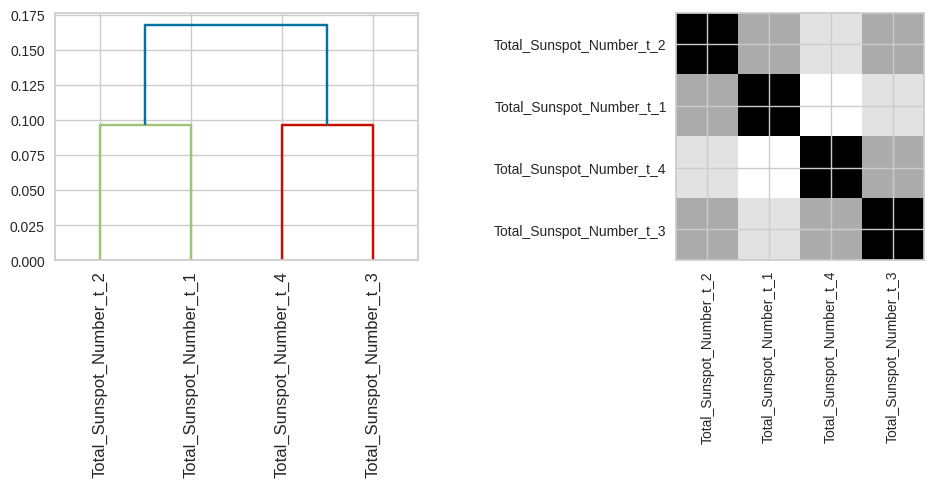

cluster_ids =  [1 1 1 1]
selected_features_names =  ['Total_Sunspot_Number_t_4']


In [47]:
plot_correlation(df_s, target_col_ts, t=1)

In [48]:
encoding(df_s, threshold_cat, target_col_ts);

Encoding numeric column: Total_Sunspot_Number_t
Encoding numeric column: Total_Sunspot_Number_t_4
Encoding numeric column: Total_Sunspot_Number_t_3
Encoding numeric column: Total_Sunspot_Number_t_2
Encoding numeric column: Total_Sunspot_Number_t_1


## Splitting dataframe in features and targets

In [49]:
y = df_s[target_col_ts]

In [50]:
X = df_s.drop(target_col_ts, axis=1)

### Dimensions

In [51]:
nb_features = len(X.columns.tolist())

In [52]:
nb_targets = 1

In [53]:
layer_size = nb_features + nb_targets + 2

### Splitting data in train and test sets 

In [54]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size)

# Modeling: Model selection

## Model building

### Pipeline building

#### Select the categorical and numerical columns

In [55]:
cat_selector, num_selector = get_features()

#### For models based on tree

In [56]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [57]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True))

In [58]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

#### For models not based on tree

In [59]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False))

In [60]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler())

In [61]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

#### Level-0 models

In [62]:
level_0 = [ 
          ('GPRL', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPRR', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPRQ', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('ELNE', make_pipeline(ntree_preprocessor, ElasticNet(alpha=0.01, l1_ratio=0.15, random_state = random_state))), 
          ('ELNECV', make_pipeline(ntree_preprocessor, ElasticNetCV(cv=5, random_state = random_state))), 
          ('LINR', make_pipeline(ntree_preprocessor, LinearRegression())), 
          ('MLPR1', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (layer_size, ), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('MLPR2', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (layer_size, layer_size,), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('KNRU', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='uniform'))), 
          ('KNRD', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='distance'))), 
          ('SVRL', make_pipeline(ntree_preprocessor, SVR(kernel='linear'))), 
          ('SVRP', make_pipeline(ntree_preprocessor, SVR(kernel='poly'))), 
          ('SVRG', make_pipeline(ntree_preprocessor, SVR(kernel='rbf'))), 
          ]

#### Level-1 model

In [63]:
level_1 = Ridge(alpha=1, positive=True, random_state = random_state)

#### Stacking for regression

In [64]:
model = StackingRegressor(level_0, final_estimator=level_1, n_jobs=-1)

## Model fitting

In [65]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/ho

CPU times: user 452 ms, sys: 291 ms, total: 743 ms
Wall time: 1min 50s


StackingRegressor(estimators=[('GPRL',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('pipeline-1',
                                                                                 Pipeline(steps=[('iterativeimputer',
                                                                                                  IterativeImputer(add_indicator=True,
                                                                                                                   random_state=42)),
                                                                                                 ('standardscaler',
                                                                                                  StandardScaler())]),
                                                                                 0    Total_Sunspot_Number_t_4
1    Total_Sunspot_Number_t_3
2    Total_Sunspot_Number_t_2
3    Total_Sunspot_Number_t_1
N...
3    Total_Sunspot_Number_t_1
Name: column_name, dtype: object),
                                                                                ('pipeline-2',
                                                                                 Pipeline(steps=[('simpleimputer',
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('onehotencoder',
                                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                                sparse_output=False))]),
                                                                                 Series([], Name: column_name, dtype: object))])),
                                               ('svr', SVR())]))],
                  final_estimator=Ridge(alpha=1, positive=True,
                                        random_state=42),
                  n_jobs=-1)

## Model evaluation

### Model scoring

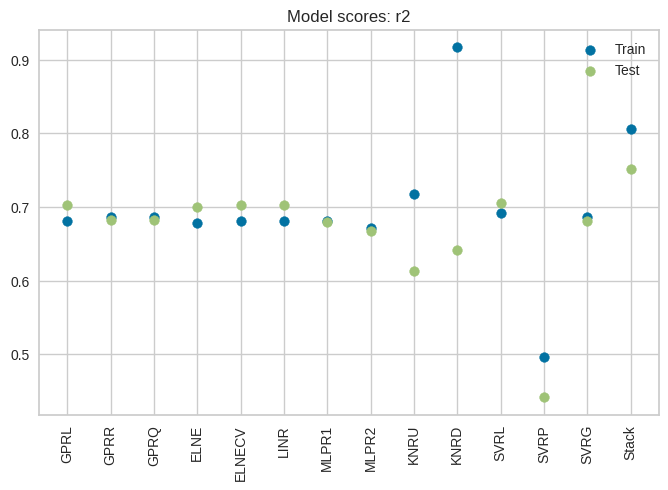

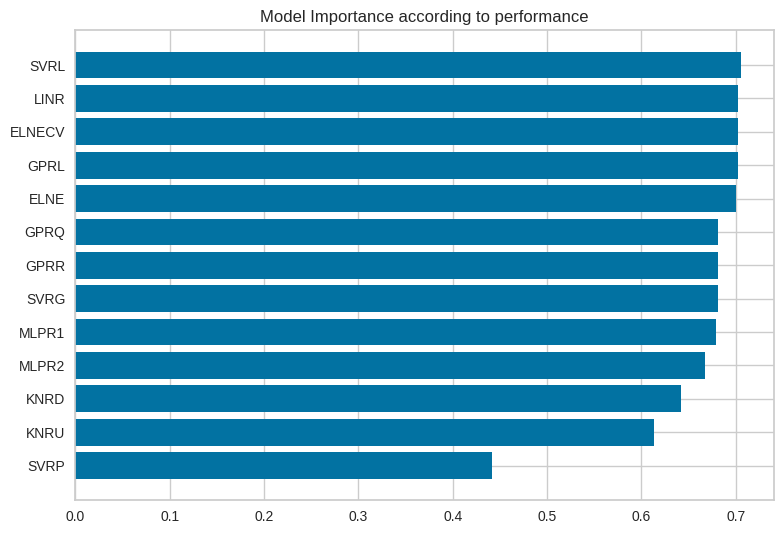

In [66]:
score_stack_0, mod_imp_score_0 = score_stacking(model, X_train, y_train, X_test, y_test)

### Residuals plot

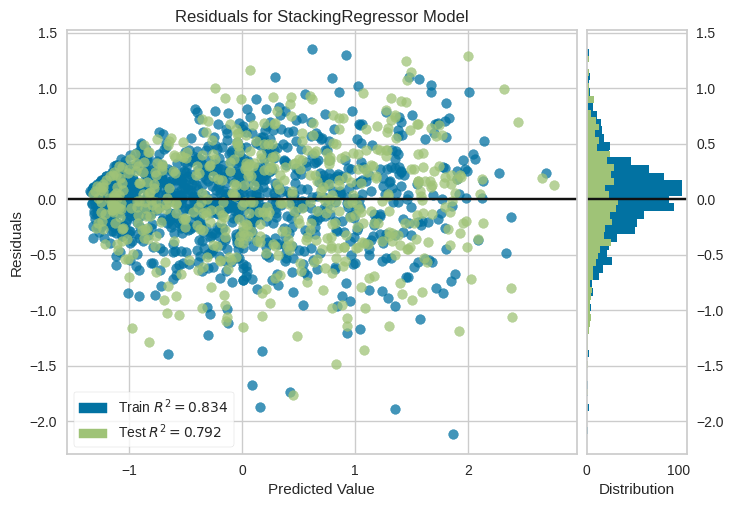

In [67]:
residuals_plot(model, X_train, y_train, X_test, y_test);

### Prediction error

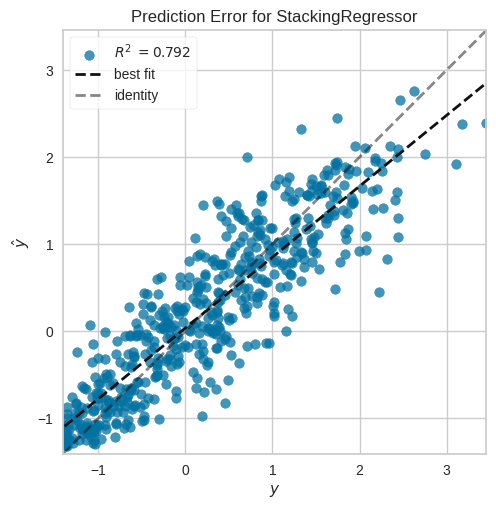

In [68]:
prediction_error(model, X_train, y_train, X_test, y_test);

### MAPE score

In [69]:
K_mape(model,X_train, y_train, X_test, y_test)

### Time series evaluation

In [70]:
plot_ts_results(X_train, y_train, X_test, y_test, model=model, confidence=(0.8,1,0.01), plot_intervals=True, plot_anomalies=False)

interactive(children=(FloatSlider(value=0.89, description='confidence', max=1.0, min=0.8, step=0.01), Checkbox…

## Model inspection

### Model importance

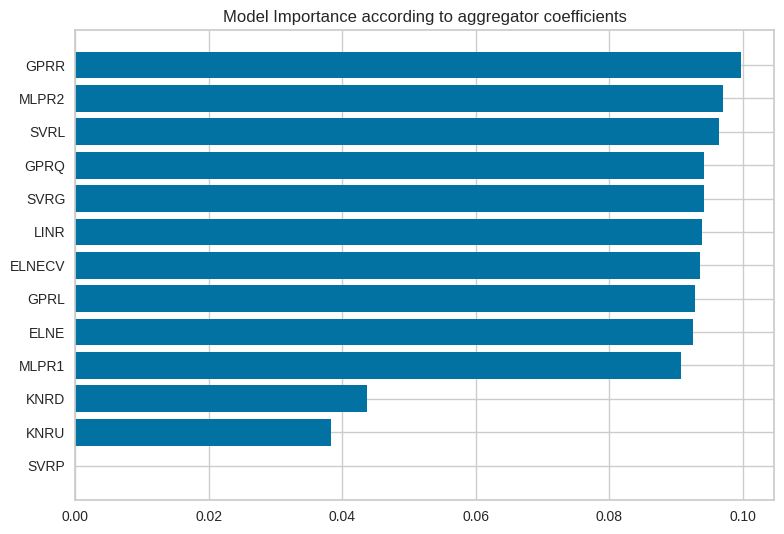

In [71]:
model_imp_0 = plot_model_importance(model, level_1_model)

### Feature permutation importance

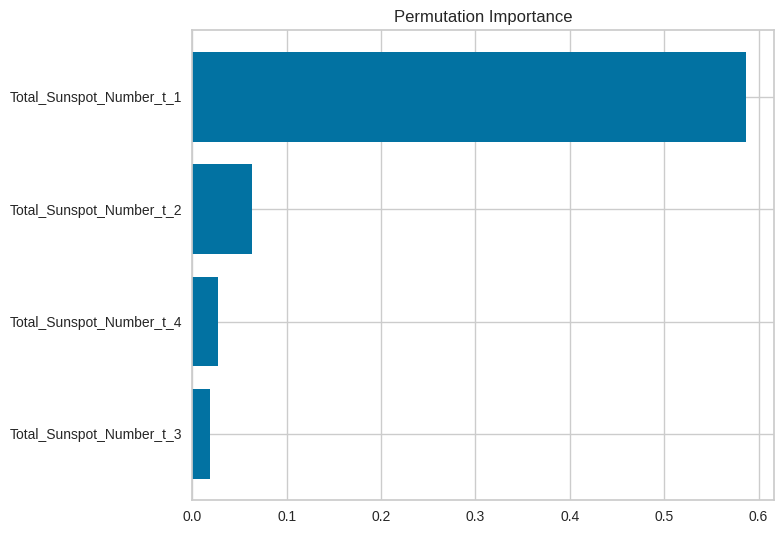

In [72]:
feature_importance_0 = plot_perm_importance(model, X_test, y_test, CPU)

# Modeling: Feature selection

#### Filtered Level-0 models

In [73]:
level_0_f = model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)

#### Build filtered model

In [74]:
model = StackingRegressor(level_0_f, final_estimator=level_1, n_jobs=-1)

## Filtered Model fitting

In [75]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/home/fifi/anaconda3/envs/ezstacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


CPU times: user 76.3 ms, sys: 6.64 ms, total: 82.9 ms
Wall time: 27.6 s


StackingRegressor(estimators=[('GPRL',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('pipeline-1',
                                                                                 Pipeline(steps=[('iterativeimputer',
                                                                                                  IterativeImputer(add_indicator=True,
                                                                                                                   random_state=42)),
                                                                                                 ('standardscaler',
                                                                                                  StandardScaler())]),
                                                                                 0    Total_Sunspot_Number_t_4
1    Total_Sunspot_Number_t_3
2    Total_Sunspot_Number_t_2
3    Total_Sunspot_Number_t_1
N...
3    Total_Sunspot_Number_t_1
Name: column_name, dtype: object),
                                                                                ('pipeline-2',
                                                                                 Pipeline(steps=[('simpleimputer',
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('onehotencoder',
                                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                                sparse_output=False))]),
                                                                                 Series([], Name: column_name, dtype: object))])),
                                               ('svr',
                                                SVR(kernel='linear'))]))],
                  final_estimator=Ridge(alpha=1, positive=True,
                                        random_state=42),
                  n_jobs=-1)

## Filtered Model evaluation

### Filtered Model scoring

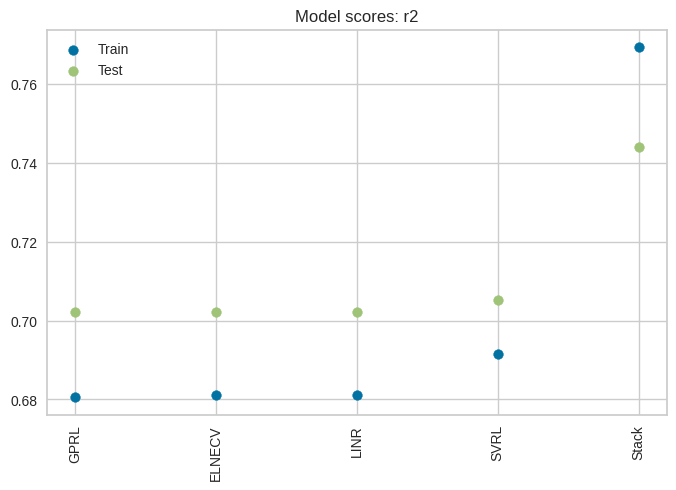

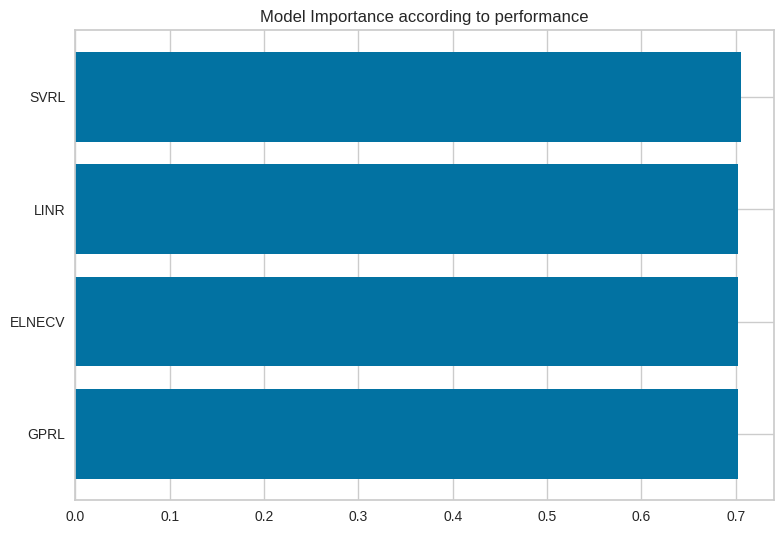

In [76]:
score_stack_1, mod_imp_score_1 = score_stacking(model, X_train, y_train, X_test, y_test)

### Filtered mape score

In [77]:
K_mape(model,X_train, y_train, X_test, y_test)

### Filtered Time series evaluation

In [78]:
plot_ts_results(X_train, y_train, X_test, y_test, model=model, confidence=(0.8,1,0.01), plot_intervals=True, plot_anomalies=False)

interactive(children=(FloatSlider(value=0.89, description='confidence', max=1.0, min=0.8, step=0.01), Checkbox…

### Filtered Residuals plot

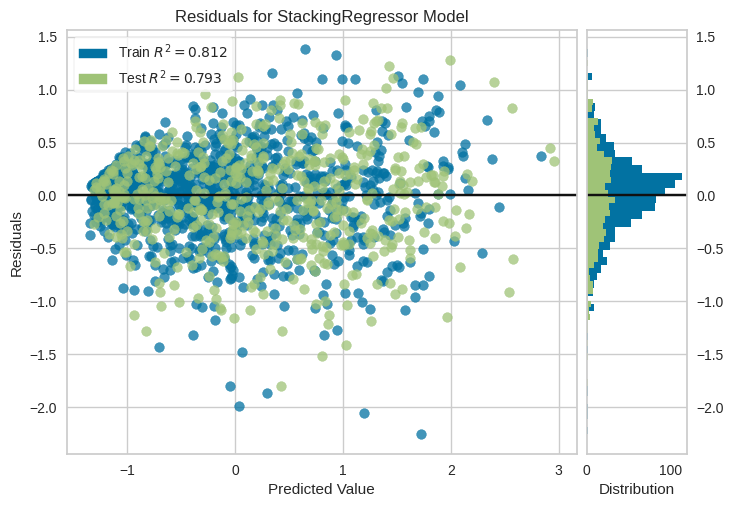

In [79]:
residuals_plot(model, X_train, y_train, X_test, y_test);

### Filtered Prediction error

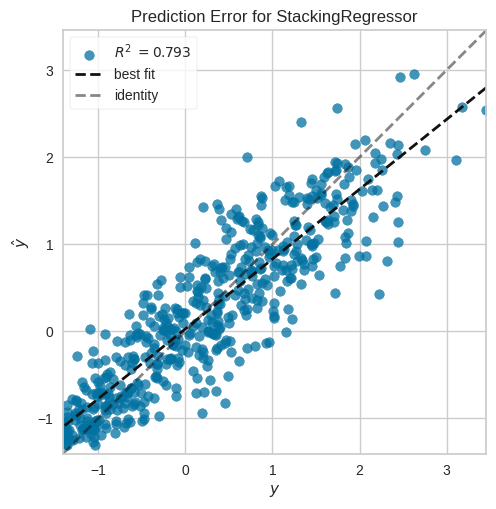

In [80]:
prediction_error(model, X_train, y_train, X_test, y_test);

## Filtered Model inspection

### Filtered Model importance

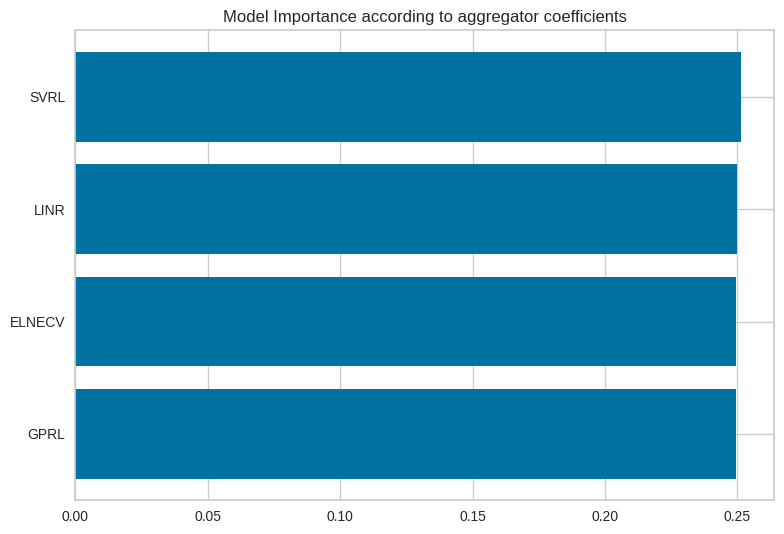

In [81]:
model_imp_1 = plot_model_importance(model, level_1_model)

### Filtered feature permutation importance

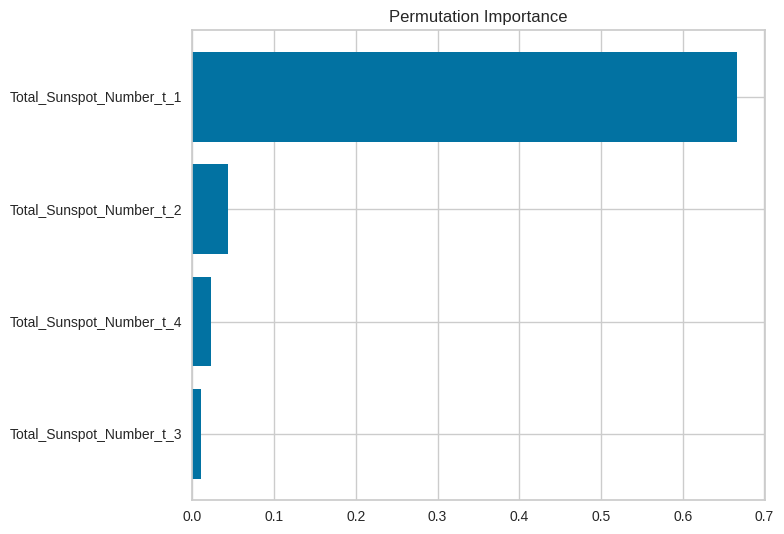

In [82]:
feature_importance_1 = plot_perm_importance(model, X_test, y_test, CPU)

#### Filtered feature elimination

In [83]:
best_feature, worst_feature = feature_filtering(feature_importance_1, threshold_feature)

In [84]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [85]:
print(dropped_cols)

['Unnamed: 0']


# Modeling: Final model

In [86]:
df_copy = df.copy() 

In [87]:
df_s, target_col_ts, preds = ts_dataframe_to_supervised(df_copy, target=target_col, n_in=lag_number, n_out=0, dropT=True) 

In [88]:
df_s = df_s.drop(dropped_cols, axis=1, errors='ignore')

In [89]:
reduce_schema('column_name', dropped_cols)

## Quick EDA 

Correlation matrix


Hierarchical clustering


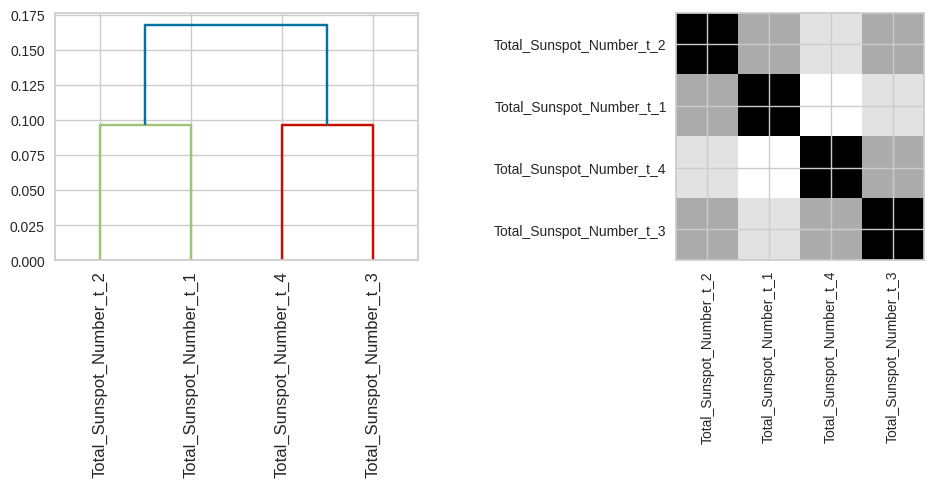

cluster_ids =  [1 1 1 1]
selected_features_names =  ['Total_Sunspot_Number_t_4']


In [90]:
plot_correlation(df_s, target_col_ts, t=1) 

### Splitting dataframe in features and targets

In [91]:
y = df_s[target_col_ts] 

In [92]:
X = df_s.drop(target_col_ts, axis=1) 

### Dimensions

In [93]:
nb_features = len(X.columns.tolist()) 

In [94]:
nb_targets = 1 

In [95]:
layer_size = nb_features + nb_targets + 2 

### Splitting data in train and test sets 

In [96]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size) 

## Final model building

#### Select the categorical and numerical columns

In [97]:
cat_selector, num_selector = get_features() 

#### For models based on tree

In [98]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)) 

In [99]:
num_tree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True)) 

In [100]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)) 

#### For models not based on tree

In [101]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse_output=False)) 

In [102]:
num_ntree_processor = make_pipeline(IterativeImputer(random_state=random_state, add_indicator=True), StandardScaler()) 

In [103]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)) 

#### Final level-0 models

In [104]:
level_0 = [ 
          ('GPRL', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPRR', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('GPRQ', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel(), random_state = random_state))), 
          ('ELNE', make_pipeline(ntree_preprocessor, ElasticNet(alpha=0.01, l1_ratio=0.15, random_state = random_state))), 
          ('ELNECV', make_pipeline(ntree_preprocessor, ElasticNetCV(cv=5, random_state = random_state))), 
          ('LINR', make_pipeline(ntree_preprocessor, LinearRegression())), 
          ('MLPR1', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (layer_size, ), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('MLPR2', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (layer_size, layer_size,), max_iter=2000, early_stopping=True, random_state = random_state))), 
          ('KNRU', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='uniform'))), 
          ('KNRD', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='distance'))), 
          ('SVRL', make_pipeline(ntree_preprocessor, SVR(kernel='linear'))), 
          ('SVRP', make_pipeline(ntree_preprocessor, SVR(kernel='poly'))), 
          ('SVRG', make_pipeline(ntree_preprocessor, SVR(kernel='rbf'))), 
          ]

In [105]:
level_0_f = list(set(level_0) & set(model_filtering(level_0, model_imp_0, threshold_model, score_stack_0, threshold_score)))

#### Build the final model

In [106]:
model = StackingRegressor(level_0_f, final_estimator=level_1, n_jobs=-1)

## Final Model fitting

In [107]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 95.2 ms, sys: 9.28 ms, total: 105 ms
Wall time: 26.4 s


StackingRegressor(estimators=[('ELNECV',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('pipeline-1',
                                                                                 Pipeline(steps=[('iterativeimputer',
                                                                                                  IterativeImputer(add_indicator=True,
                                                                                                                   random_state=42)),
                                                                                                 ('standardscaler',
                                                                                                  StandardScaler())]),
                                                                                 0    Total_Sunspot_Number_t_4
1    Total_Sunspot_Number_t_3
2    Total_Sunspot_Number_t_2
3    Total_Sunspot_Number_t_...
Name: column_name, dtype: object),
                                                                                ('pipeline-2',
                                                                                 Pipeline(steps=[('simpleimputer',
                                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                                 ('onehotencoder',
                                                                                                  OneHotEncoder(handle_unknown='ignore',
                                                                                                                sparse_output=False))]),
                                                                                 Series([], Name: column_name, dtype: object))])),
                                               ('linearregression',
                                                LinearRegression())]))],
                  final_estimator=Ridge(alpha=1, positive=True,
                                        random_state=42),
                  n_jobs=-1)

## Final Model evaluation

### Final Model scoring

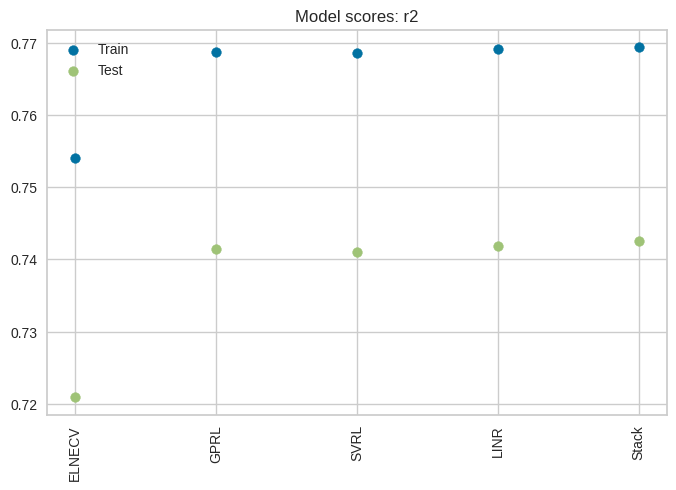

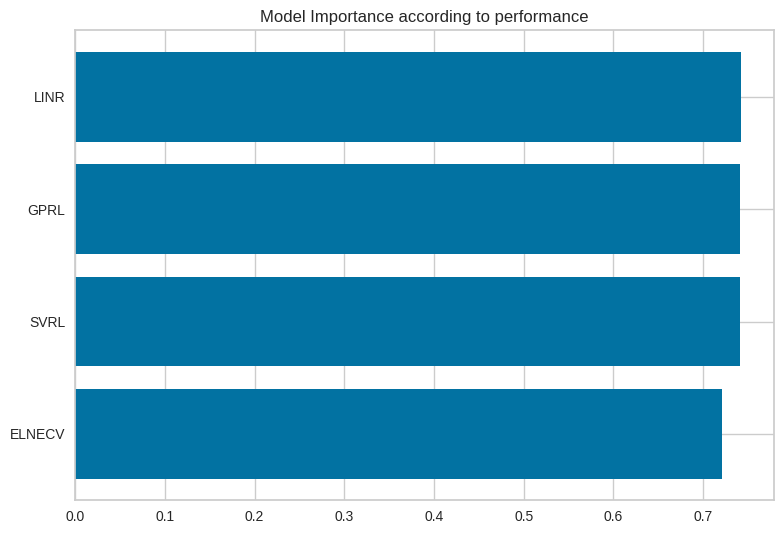

In [108]:
score_stack_2, mod_imp_score_2 = score_stacking(model, X_train, y_train, X_test, y_test)

### Final feature permutation importance

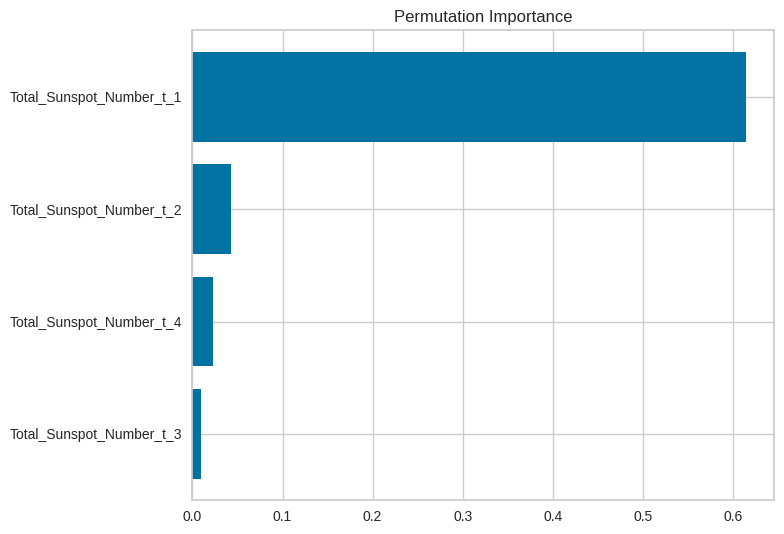

In [109]:
feature_importance_2 = feature_importance = plot_perm_importance(model, X_test, y_test, CPU)

### Final feature elimination

In [110]:
best_feature, worst_feature = feature_filtering(feature_importance_2, threshold_feature)

### Final Residuals plot

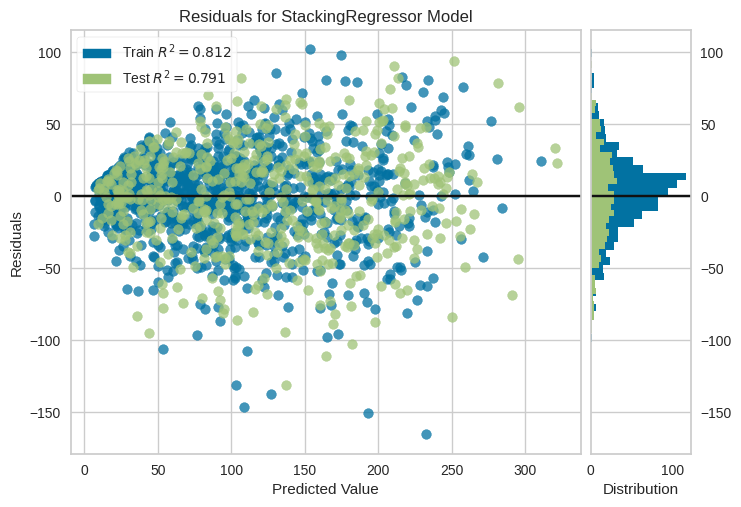

In [111]:
residuals_plot(model, X_train, y_train, X_test, y_test);

### Final Prediction error

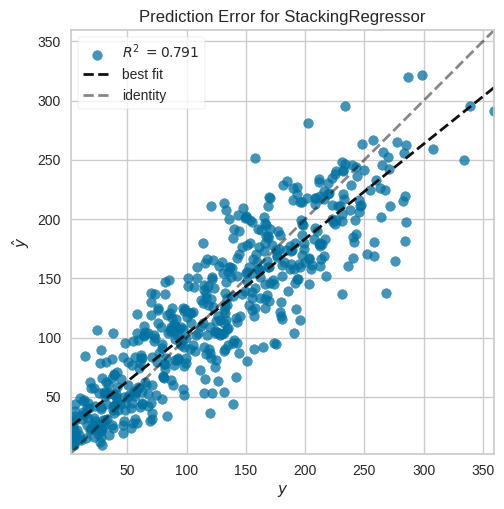

In [112]:
prediction_error(model, X_train, y_train, X_test, y_test);

### Final MAPE score

In [113]:
K_mape(model,X_train, y_train, X_test, y_test)

### Final Time series evaluation

In [114]:
plot_ts_results(X_train, y_train, X_test, y_test, model=model, confidence=(0.8,1,0.01), plot_intervals=True, plot_anomalies=False)

interactive(children=(FloatSlider(value=0.89, description='confidence', max=1.0, min=0.8, step=0.01), Checkbox…

## Final Model inspection

### Final Model importance

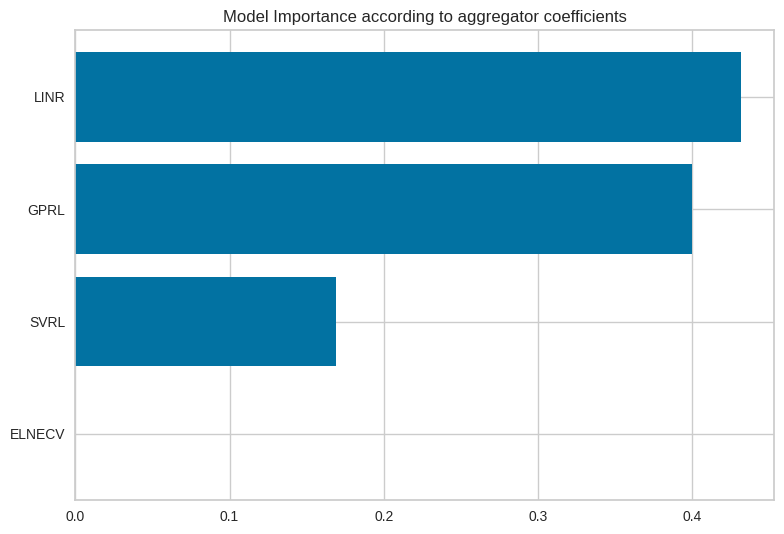

In [115]:
model_imp_2 = plot_model_importance(model, level_1_model)

### Final Feature permutation importance

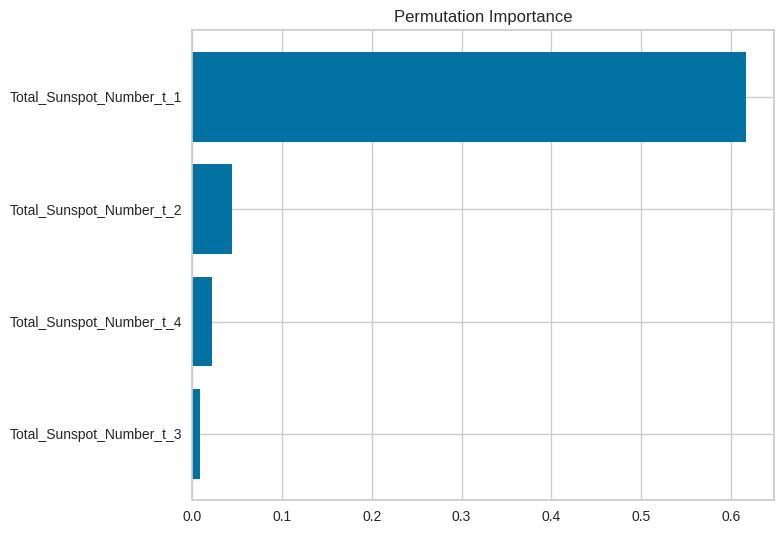

array([['Total_Sunspot_Number_t_3', 0.008604285932581512],
       ['Total_Sunspot_Number_t_4', 0.02163265026626223],
       ['Total_Sunspot_Number_t_2', 0.044546631758092536],
       ['Total_Sunspot_Number_t_1', 0.6171675149800765]], dtype=object)

In [116]:
plot_perm_importance(model, X_test, y_test, CPU)

### Final Partial Dependence & Individual Conditional Expectation 

In [117]:
pd_ice_plot(model=model, X=X_test, feature=X_test.columns.tolist(), CPU=CPU)

interactive(children=(Dropdown(description='feature', options=('Total_Sunspot_Number_t_4', 'Total_Sunspot_Numb…

# Test & Deployment

### Save the model

In [118]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate the server

In [119]:
fastapi_server(model, 'model.sav', X, y, FastAPI_port, with_keras)

### [Test the API](./server.ipynb)

### Docker

In [120]:
dockerize(name, model, model_name, X, y, Docker_port, with_keras)